# Data Preprocessing

In [ ]:
import pandas as pd

df = pd.read_csv('transaction_data.csv')
df

,Unnamed: 0,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19996,19996,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19997,19997,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19998,19998,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


In [ ]:
#memeriksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               20000 non-null  int64  
 1   transaction_id           20000 non-null  int64  
 2   product_id               20000 non-null  int64  
 3   CustomerID               20000 non-null  int64  
 4   transaction_date         20000 non-null  object 
 5   online_order             19640 non-null  object 
 6   order_status             20000 non-null  object 
 7   brand                    19803 non-null  object 
 8   product_line             19803 non-null  object 
 9   product_class            19803 non-null  object 
 10  product_size             19803 non-null  object 
 11  list_price               20000 non-null  float64
 12  standard_cost            19803 non-null  float64
 13  product_first_sold_date  19803 non-null  float64
 14  InvoiceDate           

In [ ]:
# ubah invoice date ke datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               20000 non-null  int64         
 1   transaction_id           20000 non-null  int64         
 2   product_id               20000 non-null  int64         
 3   CustomerID               20000 non-null  int64         
 4   transaction_date         20000 non-null  object        
 5   online_order             19640 non-null  object        
 6   order_status             20000 non-null  object        
 7   brand                    19803 non-null  object        
 8   product_line             19803 non-null  object        
 9   product_class            19803 non-null  object        
 10  product_size             19803 non-null  object        
 11  list_price               20000 non-null  float64       
 12  standard_cost            19803 n

## Mencari Missing Values

In [ ]:
#mencari missing values
missing = df.isnull().sum().rename('Jumlah').sort_values(ascending = False)

# ubah ke dataframe (dari series)
missing = pd.DataFrame(missing)
missing

,Jumlah
online_order,360
brand,197
product_line,197
product_class,197
product_size,197
standard_cost,197
product_first_sold_date,197
Unnamed: 0,0
transaction_id,0
product_id,0


<Axes: >

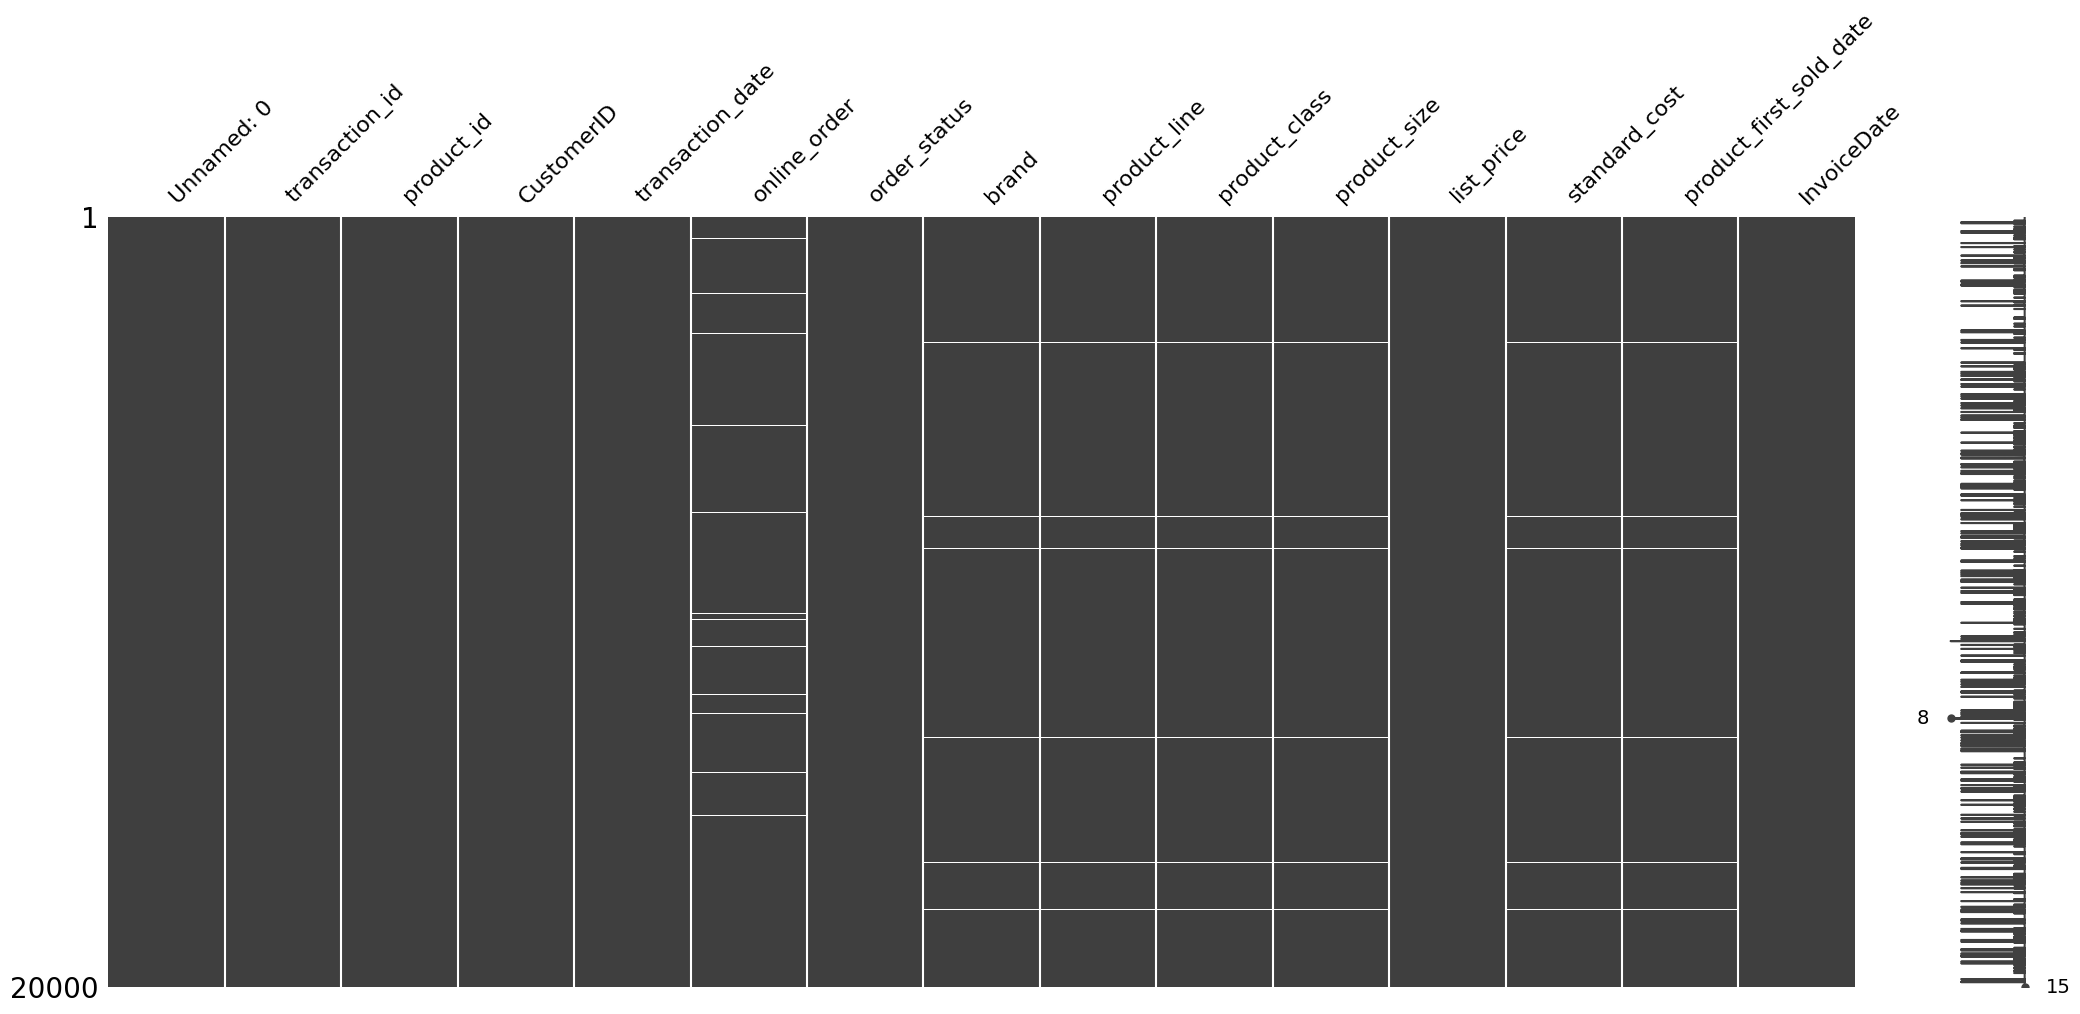

In [ ]:
import missingno as msno

msno.matrix(df)

## Menangani Missing Values

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('unknown')
    elif df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(0)

<Axes: >

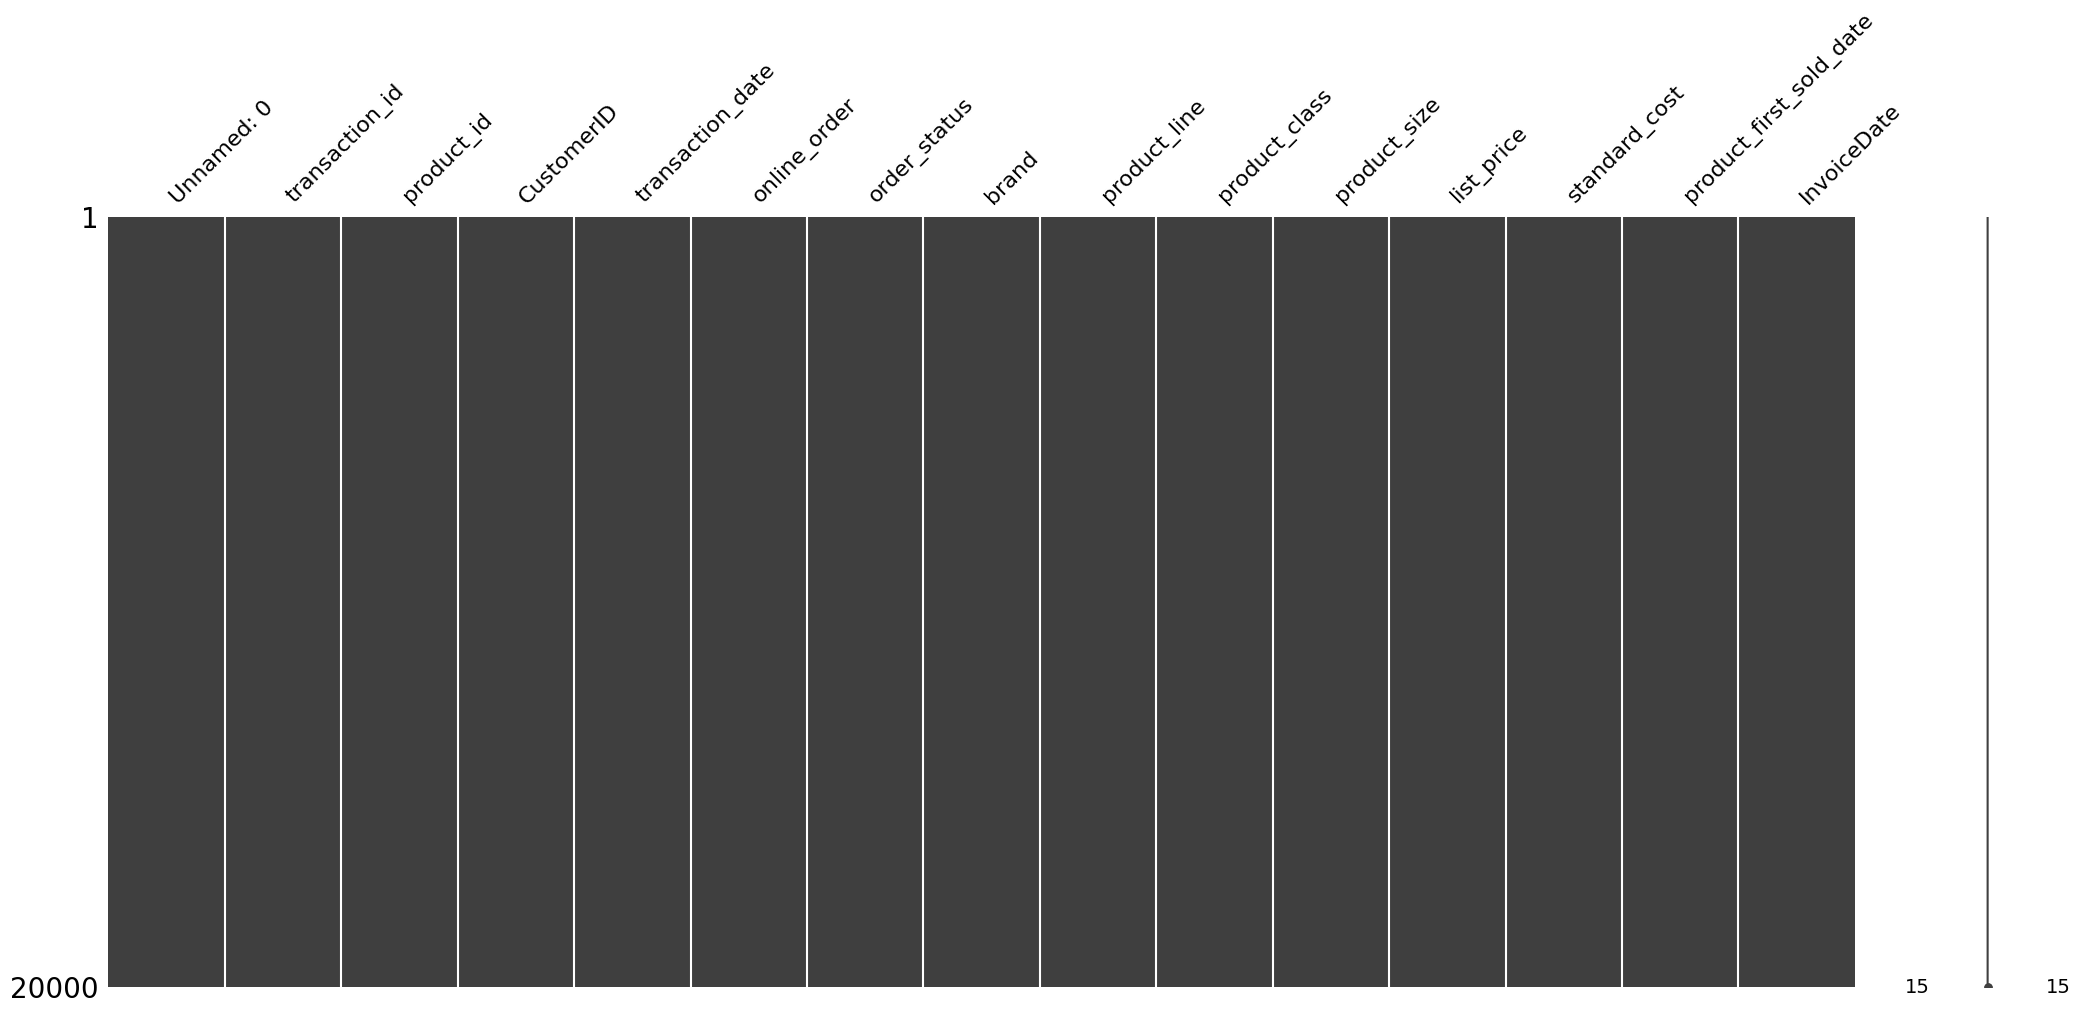

In [ ]:
import missingno as msno

msno.matrix(df)

#Recency

In [ ]:
# mengambil data paling akhir (max) dari data
current_date = df['InvoiceDate'].max()
current_date

Timestamp('2017-12-30 00:00:00')

In [ ]:
#Mencari tanggal terakhir setiap customer belanja
last_transaction = df.groupby('CustomerID')['InvoiceDate'].max()
last_transaction

,InvoiceDate
CustomerID,
1,2017-12-23
2,2017-08-24
3,2017-09-19
4,2017-06-18
5,2017-12-14
...,...
3497,2017-11-08
3498,2017-08-25
3499,2017-11-09


In [ ]:
##Mencari selisih antara tanggal terkini (current date) dengan tanggal terakhir customer belanja / transaksi

recency = current_date - last_transaction
recency

,InvoiceDate
CustomerID,
1,7 days
2,128 days
3,102 days
4,195 days
5,16 days
...,...
3497,52 days
3498,127 days
3499,51 days


In [ ]:
# ubah dalam bentuk hari
recency = (current_date - last_transaction).dt.days
recency = recency.rename('Recency')
recency

,Recency
CustomerID,
1,7
2,128
3,102
4,195
5,16
...,...
3497,52
3498,127
3499,51


#Frequency

In [ ]:
## Mencari berapa kali (nunique) InvoiceNote untuk setiap customer ID belanja di perusahaan ini
frequency = df.groupby('CustomerID')['transaction_id'].nunique()
frequency = frequency.rename('Frequency')
frequency

,Frequency
CustomerID,
1,11
2,3
3,8
4,2
5,6
...,...
3497,3
3498,6
3499,7


#Monetery

In [ ]:
#Menghitung total nominal dari unit price dikali dengan quantity
df['TotalPrice'] = df['list_price'].sum
df

,Unnamed: 0,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,TotalPrice
0,0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,<bound method Series.sum of 0 71.49\n...
1,1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,<bound method Series.sum of 0 71.49\n...
2,2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,<bound method Series.sum of 0 71.49\n...
3,3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,<bound method Series.sum of 0 71.49\n...
4,4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,<bound method Series.sum of 0 71.49\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,<bound method Series.sum of 0 71.49\n...
19996,19996,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,<bound method Series.sum of 0 71.49\n...
19997,19997,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,<bound method Series.sum of 0 71.49\n...
19998,19998,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,<bound method Series.sum of 0 71.49\n...


In [ ]:
#Sum (total) dari seluruh nominal transaksi untuk setiap customer ID
monetary = df.groupby('CustomerID')['list_price'].sum()
monetary = monetary.rename('Monetary')
monetary

,Monetary
CustomerID,
1,9084.45
2,4149.07
3,9888.23
4,1047.72
5,5903.20
...,...
3497,3744.07
3498,5177.06
3499,7673.48


#DataFrame RFM

In [ ]:
rfm = pd.DataFrame(
    {
        'Recency': recency,
        'Frequency': frequency,
        'Monetary': monetary
    }
).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,8,9888.23
3,4,195,2,1047.72
4,5,16,6,5903.20
...,...,...,...,...
3489,3497,52,3,3744.07
3490,3498,127,6,5177.06
3491,3499,51,7,7673.48
3492,3500,144,6,4922.41


#Describe RFM

In [ ]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3494.000000,3494.000000,3494.000000,3494.000000
mean,1750.856039,60.813681,5.724098,6341.324837
std,1011.902531,57.787120,2.325873,2959.132004
min,1.000000,0.000000,1.000000,60.340000
25%,876.250000,17.000000,4.000000,4198.390000
50%,1750.500000,44.000000,6.000000,6026.800000
75%,2624.750000,85.000000,7.000000,8208.837500
max,5034.000000,353.000000,14.000000,19071.320000


#Histogram dan Boxplot RFM

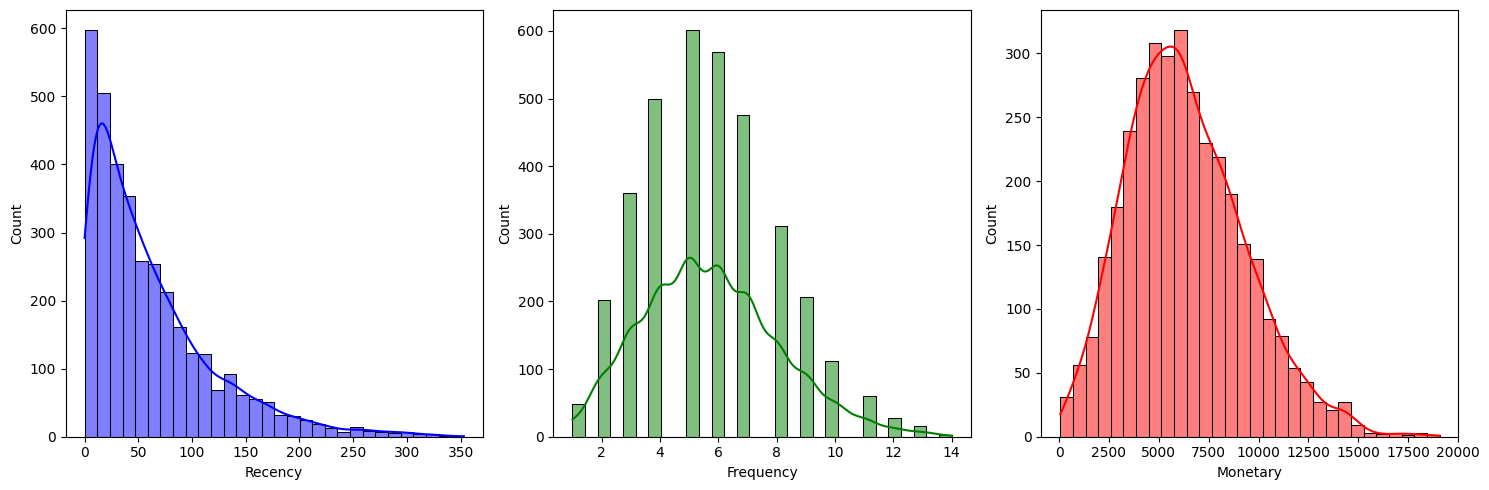

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], kde=True,color='blue', bins=30)

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], kde=True,color='green', bins=30)

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], kde=True,color='red', bins=30)


plt.tight_layout()
plt.show()

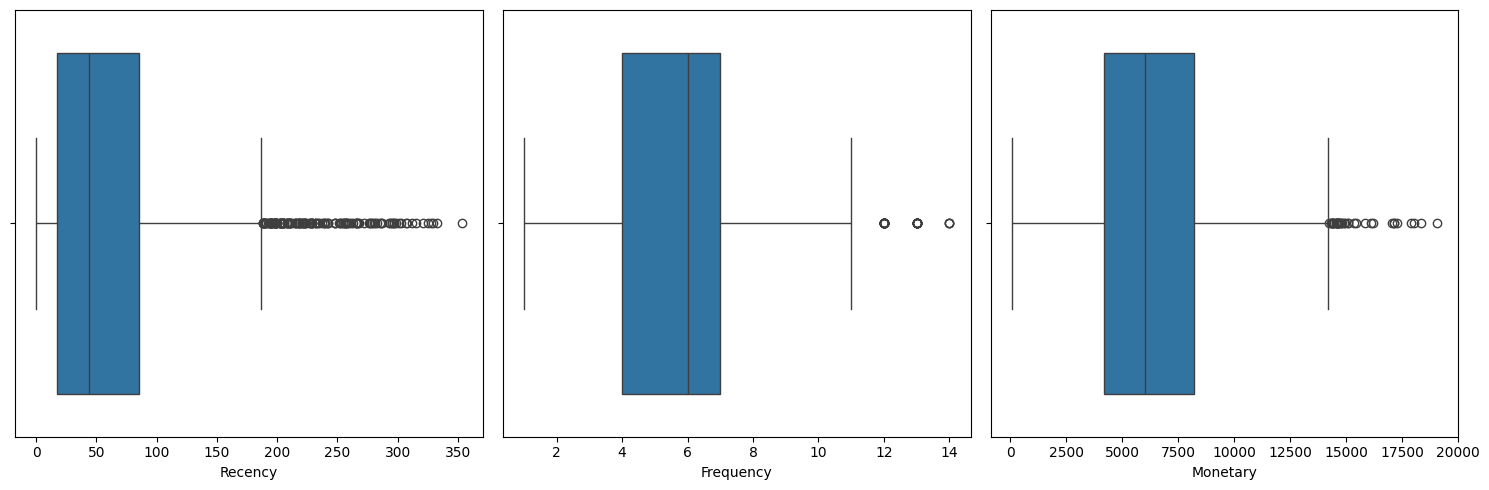

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = rfm['Recency'])

plt.subplot(1,3,2)
sns.boxplot(x = rfm['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(x = rfm['Monetary'])


plt.tight_layout()
plt.show()

#RFM Score

In [ ]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3494.000000,3494.000000,3494.000000,3494.000000
mean,1750.856039,60.813681,5.724098,6341.324837
std,1011.902531,57.787120,2.325873,2959.132004
min,1.000000,0.000000,1.000000,60.340000
25%,876.250000,17.000000,4.000000,4198.390000
50%,1750.500000,44.000000,6.000000,6026.800000
75%,2624.750000,85.000000,7.000000,8208.837500
max,5034.000000,353.000000,14.000000,19071.320000


In [ ]:
def rfm_score(baris):
        # recency
        if baris['Recency'] <= 17:
            r = 4
        elif baris['Recency'] <= 44 and baris['Recency'] > 17:
            r = 3
        elif baris['Recency'] <= 85 and baris['Recency'] > 44:
            r = 2
        else:
            r = 1

        # frequency
        if baris['Frequency'] <= 4:
            f = 1
        elif baris['Frequency'] <= 6 and baris['Frequency'] > 4:
            f = 2
        elif baris['Frequency'] <= 7 and baris['Frequency'] > 6:
            f = 3
        elif baris['Frequency'] <= 11 and baris['Frequency'] > 7:
            f = 4
        else:
            f = 5

        # monetary
        if baris['Monetary'] <= 4000:
            m = 1
        elif baris['Monetary'] <= 6000 and baris['Monetary'] > 4000:
            m = 2
        elif baris['Monetary'] <= 7000 and baris['Monetary'] > 6000:
            m = 3
        elif baris['Monetary'] <= 14000 and baris['Monetary'] > 7000:
            m = 4
        else:
            m = 5

        return r+f+m

rfm['RFM_Score ']= rfm.apply(rfm_score, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score
0,1,7,11,9084.45,12
1,2,128,3,4149.07,4
2,3,102,8,9888.23,9
3,4,195,2,1047.72,3
4,5,16,6,5903.20,8
...,...,...,...,...,...
3489,3497,52,3,3744.07,4
3490,3498,127,6,5177.06,5
3491,3499,51,7,7673.48,9
3492,3500,144,6,4922.41,5


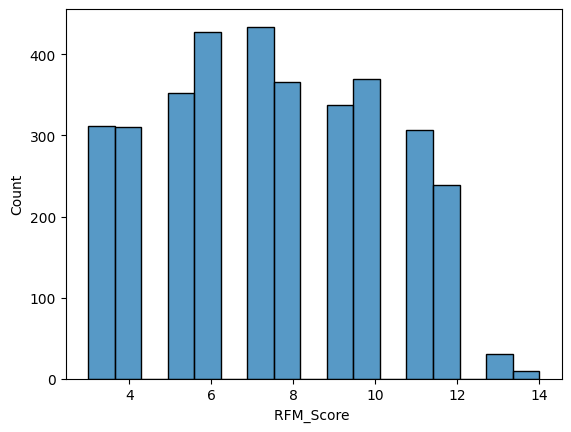

In [ ]:
sns.histplot(rfm['RFM_Score '])
plt.show()

In [ ]:
def rfm_score(baris):
    # recency
    if baris['Recency'] <= 17:
        r = 4
    elif baris['Recency'] <= 44 and baris['Recency'] > 17:
        r = 3
    elif baris['Recency'] <= 85 and baris['Recency'] > 44:
        r = 2
    else:
        r = 1

    # frequency
    if baris['Frequency'] <= 4:
        f = 1
    elif baris['Frequency'] <= 6 and baris['Frequency'] > 4:
        f = 2
    elif baris['Frequency'] <= 7 and baris['Frequency'] > 6:
        f = 3
    elif baris['Frequency'] <= 11 and baris['Frequency'] > 7:
        f = 4
    else:
        f = 5

    # monetary
    if baris['Monetary'] <= 4000:
        m = 1
    elif baris['Monetary'] <= 6000 and baris['Monetary'] > 4000:
        m = 2
    elif baris['Monetary'] <= 7000 and baris['Monetary'] > 6000:
        m = 3
    elif baris['Monetary'] <= 14000 and baris['Monetary'] > 7000:
        m = 4
    else:
        m = 5

    return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m}) # Mengembalikan Series bukan sum

rfm[['R_Score', 'F_Score', 'M_Score']] = rfm.apply(rfm_score, axis=1) # Menambahkan kolom R, F, dan M
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score'] # Menghitung RFM Score
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score,R_Score,F_Score,M_Score,RFM_Score
0,1,7,11,9084.45,12,4,4,4,12
1,2,128,3,4149.07,4,1,1,2,4
2,3,102,8,9888.23,9,1,4,4,9
3,4,195,2,1047.72,3,1,1,1,3
4,5,16,6,5903.20,8,4,2,2,8
...,...,...,...,...,...,...,...,...,...
3489,3497,52,3,3744.07,4,2,1,1,4
3490,3498,127,6,5177.06,5,1,2,2,5
3491,3499,51,7,7673.48,9,2,3,4,9
3492,3500,144,6,4922.41,5,1,2,2,5


# Klasterisasi Pelanggan

In [ ]:
rfm['FM_Score'] = rfm['F_Score'] + rfm['M_Score']

# Manual Clustering using IF-ELSE Conditions
def segment_customer(row):
    recency = row['R_Score']
    fm_combined = row['FM_Score']
    if recency >= 4 and fm_combined >= 4:
        return 'Champions'
    elif recency >= 3 and fm_combined >= 3:
        return 'Loyal Customers'
    elif recency >= 2 and fm_combined >= 3:
        return 'Potential Loyalist'
    elif recency >= 3 and fm_combined <= 2:
        return 'Promising'
    elif recency < 2 and fm_combined >= 3:
        return 'At Risk'
    elif recency < 2 and fm_combined <= 2:
        return 'Lost'
    else:
        return 'Uncategorized'

# Apply the segmentation function
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score,R_Score,F_Score,M_Score,RFM_Score,FM_Score,Customer_Segment
0,1,7,11,9084.45,12,4,4,4,12,8,Champions
1,2,128,3,4149.07,4,1,1,2,4,3,At Risk
2,3,102,8,9888.23,9,1,4,4,9,8,At Risk
3,4,195,2,1047.72,3,1,1,1,3,2,Lost
4,5,16,6,5903.20,8,4,2,2,8,4,Champions
...,...,...,...,...,...,...,...,...,...,...,...
3489,3497,52,3,3744.07,4,2,1,1,4,2,Uncategorized
3490,3498,127,6,5177.06,5,1,2,2,5,4,At Risk
3491,3499,51,7,7673.48,9,2,3,4,9,7,Potential Loyalist
3492,3500,144,6,4922.41,5,1,2,2,5,4,At Risk


In [ ]:
rfm['Customer_Segment'].value_counts()

,count
Customer_Segment,
Loyal Customers,872
Potential Loyalist,699
Champions,685
At Risk,555
Lost,311
Promising,218
Uncategorized,154


In [ ]:
rfm['Customer_Segment'].value_counts()/len(rfm)*100

,count
Customer_Segment,
Loyal Customers,24.957069
Potential Loyalist,20.005724
Champions,19.605037
At Risk,15.884373
Lost,8.900973
Promising,6.239267
Uncategorized,4.407556


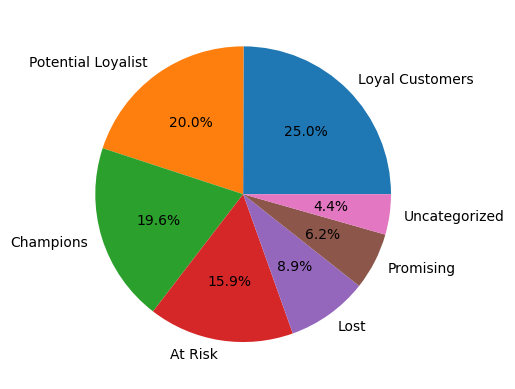

In [ ]:
plt.pie(rfm['Customer_Segment'].value_counts(), labels=rfm['Customer_Segment'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score,R_Score,F_Score,M_Score,RFM_Score,FM_Score,Customer_Segment
0,1,7,11,9084.45,12,4,4,4,12,8,Champions
1,2,128,3,4149.07,4,1,1,2,4,3,At Risk
2,3,102,8,9888.23,9,1,4,4,9,8,At Risk
3,4,195,2,1047.72,3,1,1,1,3,2,Lost
4,5,16,6,5903.20,8,4,2,2,8,4,Champions
...,...,...,...,...,...,...,...,...,...,...,...
3489,3497,52,3,3744.07,4,2,1,1,4,2,Uncategorized
3490,3498,127,6,5177.06,5,1,2,2,5,4,At Risk
3491,3499,51,7,7673.48,9,2,3,4,9,7,Potential Loyalist
3492,3500,144,6,4922.41,5,1,2,2,5,4,At Risk


In [ ]:
##untuk mengetahui data pelanggan yang masuk kedalam kelompok tertentu
##contoh pada pelanggan yang masuk kedalam kelompok Lost
atrisk = rfm[rfm['Customer_Segment'] == 'Lost'].copy()
atrisk

,CustomerID,Recency,Frequency,Monetary,RFM_Score,R_Score,F_Score,M_Score,RFM_Score,FM_Score,Customer_Segment
3,4,195,2,1047.72,3,1,1,1,3,2,Lost
6,7,253,3,995.38,3,1,1,1,3,2,Lost
25,26,113,3,3943.12,3,1,1,1,3,2,Lost
30,31,89,4,3110.00,3,1,1,1,3,2,Lost
35,36,163,2,1781.04,3,1,1,1,3,2,Lost
...,...,...,...,...,...,...,...,...,...,...,...
3416,3424,153,2,2940.52,3,1,1,1,3,2,Lost
3420,3428,91,1,1274.93,3,1,1,1,3,2,Lost
3421,3429,121,4,3323.95,3,1,1,1,3,2,Lost
3449,3457,97,3,2726.46,3,1,1,1,3,2,Lost


#Visualisasi Klaster Pelanggan

In [ ]:
import plotly as py
import plotly.graph_objs as go

# Buat pemetaan warna untuk setiap segmen customer
color_map = {
    'Champions': 'blue',
    'Loyal Customers': 'green',
    'Potential Loyalist': 'orange',
    'Promising': 'purple',
    'At Risk': 'red',
    'Lost': 'gray',
    'Uncategorized': 'black'
}

# Ubah warna marker menggunakan pemetaan
colors = [color_map[segment] for segment in rfm['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=rfm['R_Score'],
    y=rfm['F_Score'],
    z=rfm['M_Score'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Gunakan colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)

In [ ]:
import plotly as py
import plotly.graph_objs as go

# Buat pemetaan warna untuk setiap segmen customer
color_map = {
    'Champions': 'blue',
    'Loyal Customers': 'green',
    'Potential Loyalist': 'orange',
    'Promising': 'purple',
    'At Risk': 'red',
    'Lost': 'gray',
    'Uncategorized': 'black'
}

# Ubah warna marker menggunakan pemetaan
colors = [color_map[segment] for segment in rfm['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=rfm['Recency'],
    y=rfm['Frequency'],
    z=rfm['Monetary'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Gunakan colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)